## **CREDIT RISK ASSESSMENT ANALYSIS AND DEVELOPMENT OF RISK PREDICTING MODEL**

#### **INTRODUCTION**

Consumer lending has become increasingly complex in today's financial landscape, with global consumer credit reaching $52.1 trillion in 2023. The rise in digital lending platforms has made credit more accessible, but also increased the importance of robust risk assessment models. According to the Federal Reserve, credit card delinquency rates rose to 2.9% in Q3 2023, highlighting the growing importance of sophisticated credit risk analysis.

#### **PROBLEM STATEMENT**

The primary challenge in the financial sector is identifying the factors that influence the likelihood of loan defaults and developing models that can effectively predict or assess these risks. Factors such as employment length, income levels, and credit history play a significant role in repayment behavior, making it essential for institutions to understand these drivers to safeguard profitability and stability.

#### **AIMS AND OBJECTIVES**

- Identify key demographics that significantly influence the likelihood of loan default.

- Understand the influence of person credit history on loan default probability.

- Understand how the variability in interest rates affect the repayment behavior of borrowers.

- Analyze if interest rates affects the likelihood of defaults.

- Undestand the influence of loan effect on default risk.

- Develop machine learning model to improve the accuracy of credit risk assessments?

#### **DATA LOADING**

In [33]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Read the zipped CSV file

df = pd.read_csv('credit_risk_dataset.csv.zip')

The dataset contains important credit risk indicators including:

- Personal information (age, income, home ownership, employment length)
  
- Loan details (intent, amount, interest rate, status)

- Credit history (default history, credit history length)

#### **EXPLORATORY DATA ANALYSIS**

In [37]:
# Viewing top rows of the dataset

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [38]:
# view the dimension of dataset 

df.shape

(32581, 11)

The datset contains 32581 rows, 11 columns

In [40]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [41]:
# viewing structure and properties of your dataset

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [42]:
# displaying datatypes of each column in the dataset

df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

#### **DATA DISTRIBUTION**

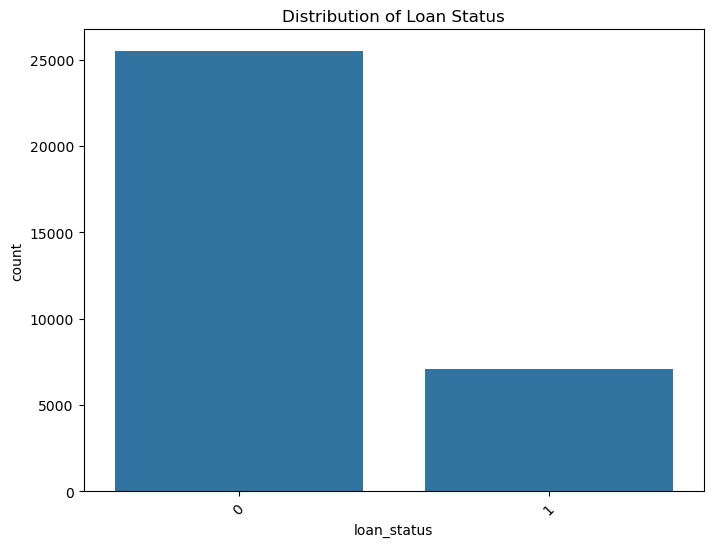

In [44]:
# Check loan status distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.show()

The loan status distribution shows the proportion of defaulted (1) vs non-defaulted (0) loans, suggesting the overall risk profile of the credit  portfolio is relatively low. Hoewver, there is still some risk present.

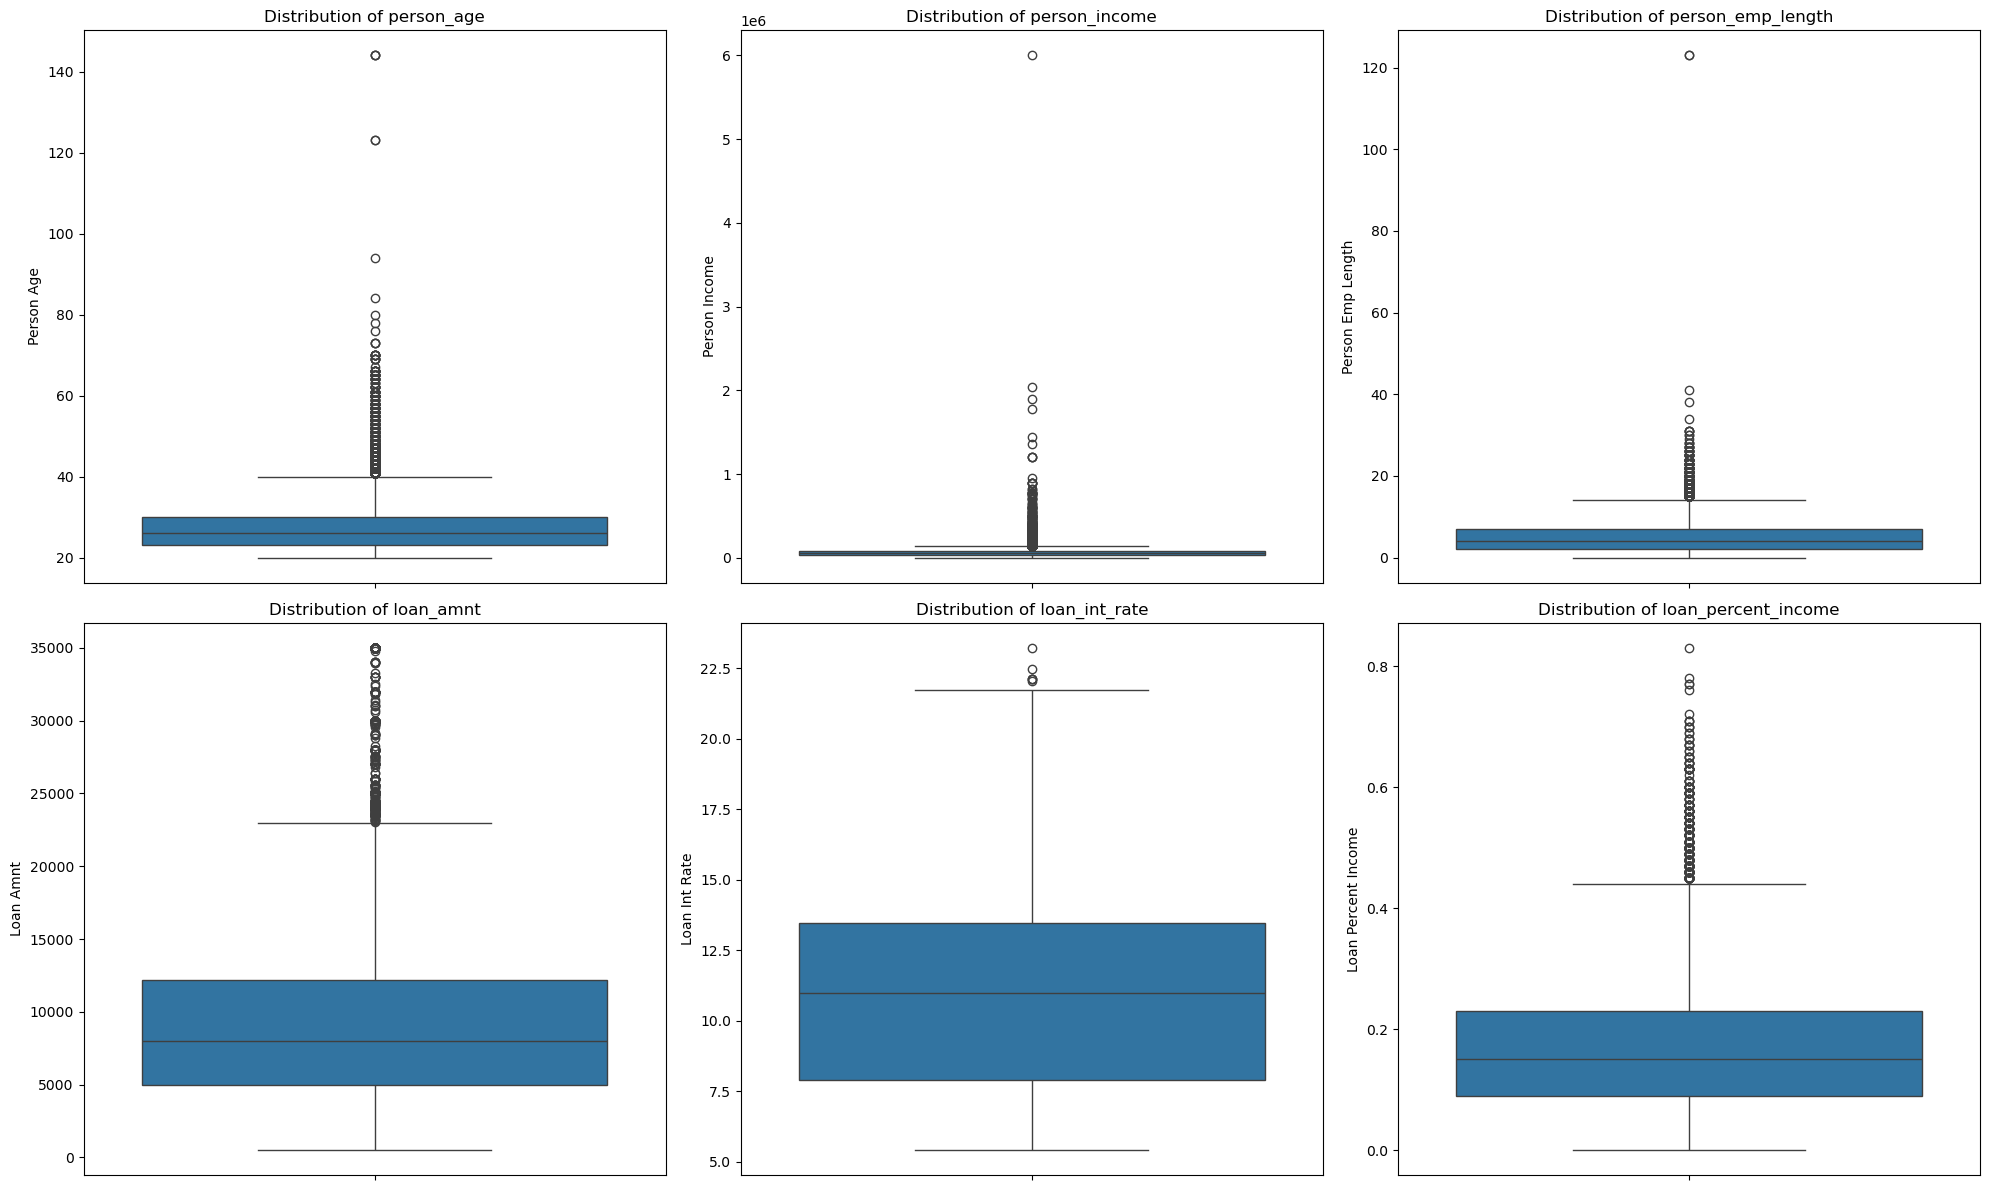

Summary Statistics for Numerical Columns:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  
count   29465.000000         32581.000000  
mean       11.011695             0.170203  
std         3.240459             0.106782  
min         5.420000             0.000000  
25%         7.900000             0.090000  
50%        10.990000             0.150000  
75%       

In [46]:
# Display Distribution for all Numerical Columns

# Select numerical columns
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 
                 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Create subplots for each numerical column
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()  # Flatten the axes array for easier iteration

# Create box plots for each numerical column
for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_ylabel(col.replace('_', ' ').title())

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics for each numerical column
print("\
Summary Statistics for Numerical Columns:")
print(df[numerical_cols].describe())

From these visualizations and statistics, we can observe:

- Person Age: Concentrated between 23-29 years, with median around 25 years

- Person Income: Shows wide variation, median around $53,000

- Employment Length: Most people have 2-6 years of employment

- Loan Amount: Typically ranges from $4,800dollars  to $11,250 dollars

- Interest Rate: Mostly between 8% and 13%, with some high outliers

- Loan Percent Income: Generally stays below 0.22 (22% of income)

Outliers have been identified in the following columns:

- Person Age
  
- Person Income
  
- Employment Length
  
- Loan Amount
  
- Interest Rate
  
- Loan Percent Income

These outliers will be thoroughly investigated to determine their validity and whether any adjustments or handling is required.

#### **DATA CLEANING**

####  Handle missing values

In [50]:
# viewing the percentage of null values

null_percentage = df.isnull().mean() * 100
null_percentage

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [51]:
# For employment length, fill with median
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

# For loan interest rate, fill with median
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [52]:
# Show data quality metrics
print("\
Data Quality Metrics:")
print("\
Missing Values After Cleaning:")
df.isnull().sum()

Data Quality Metrics:
Missing Values After Cleaning:


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

After a thorough investigation of missing values in the dataset, it was observed that a few columns had a small percentage of missing data, while the majority of the columns contained no missing values.

Columns with missing values:
- person_emp_length (2.75%)
- loan_int_rate (9.56%)

Missing values in these columns were replaced with the **median** of their respective columns. 
The median was chosen because:

- It is robust to the influence of outliers, providing a more accurate central tendency for skewed distributions.
    
- It ensures that the dataset remains unbiased and consistent, as the median reflects typical values without being disproportionately affected by extreme data points.

#### **Handling Duplicates**

In [55]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,1000,10.37,0,0.03,N,16


No duplicates were removed because the table lacks a unique identifier.

#### Removing outliers

In [58]:
# Filtering out rows with person age greater than and equal to 80

df.query('person_age >= 80')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,6500,10.99,0,0.27,N,27
32422,80,64000,RENT,7.0,MEDICAL,6800,11.71,0,0.11,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,10000,7.51,0,0.11,N,24


In [59]:
#  Filtering out rows with employment length greater than/ equal to  person age 


df.query('person_emp_length >= person_age')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [60]:
# handling outliers in age colum 

# Remove rows where 'person_age' is greater than and equal to 80
df = df[df['person_age'] < 80]

# Verify the change
print(df['person_age'].max())  # Should print a value < 80

78


In [61]:
# handling outliers in Employment Length colum 

# Remove outliers where Employment Length is greater than Age

df = df[df['person_emp_length'] <= df['person_age']]

print("Data after removing outliers where Employment Length > Age:")
df

Data after removing outliers where Employment Length > Age:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


Outliers in various columns were examined, and it was determined that the outliers in Person Income, Loan Amount, Interest Rate, and Loan Percent Income are valid and not erroneous. However, the outliers in Person Age and Employment Length were identified as true outliers that require handling.

Columns and Outlier Handling

- Person Age
    - Issue: Ages exceeding 80 years.
    - Solution: Filtered out ages greater than 80 years.
    
- Employment Length
    - Issue: Employment length exceeding person's age.
    - Solution: Removed records with employment length greater than person's age.
    
- Person Income
    - Finding: Varied incomes, valid outliers detected.
    - Action: Retained all records.
    
- Loan Amount
    - Finding: Varied loan amounts for different purposes, valid outliers detected.
    - Action: Retained all records.
    
- Interest Rate
    - Finding: No negative interest rates detected.
    - Action: Retained all records.
    
- Percent Income
    - Finding: No values exceeding 1 or below 0, valid outliers detected.
    - Action: Retained all records.
  
Outliers were identified and handled based on logical inconsistencies and unrealistic values. The goal was to maintain data integrity while minimizing data loss.

- The age column exhibited outliers beyond 80 years, which were deemed unlikely for active employment. 
  Records with ages 94, 80, 84, 112, and 144 were removed due to inconsistent employment lengths:
- Employment lengths exceeding person's age were considered invalid and removed.
- Varied incomes and loan amounts were considered valid, reflecting real-world scenarios.
- Interest rates were considered valid, as they may vary depending on loan amount and other factors.
- Percent income values were considered valid, as they did not exceed 1.

#### Converting Datatypes

In [64]:
# Convert categorical variables to proper type

categorical_cols = ['person_home_ownership', 'loan_intent','loan_status','cb_person_default_on_file']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [65]:
# Verify datatypes

df.dtypes

person_age                       int64
person_income                    int64
person_home_ownership         category
person_emp_length              float64
loan_intent                   category
loan_amnt                        int64
loan_int_rate                  float64
loan_status                   category
loan_percent_income            float64
cb_person_default_on_file     category
cb_person_cred_hist_length       int64
dtype: object

The following columns were identified as categorical variables:
- person_home_ownership
- loan_intent
- cb_person_default_on_file

To optimize memory usage and improve processing efficiency, these columns were converted to the 'category' data type. This transformation ensures that these variables are properly recognized and handled as categorical features during analysis.

#### Save and Export Cleaned Data

In [68]:
df.shape

(32571, 11)

In [69]:
# Save cleaned dataset
df.to_csv('cleaned_credit_risk_dataset.csv', index=False)
print("\
Cleaned dataset saved as 'cleaned_credit_risk_dataset.csv'")

Cleaned dataset saved as 'cleaned_credit_risk_dataset.csv'


The cleaned dataset is saved as 'cleaned_credit_risk_dataset.csv'.

Here are the details:
- Original dataset shape: (32581, 11)

Cleaning Summary:
- Records removed: 10

Final dataset shape: (32571, 11)

#### **DATA ANALYSIS**

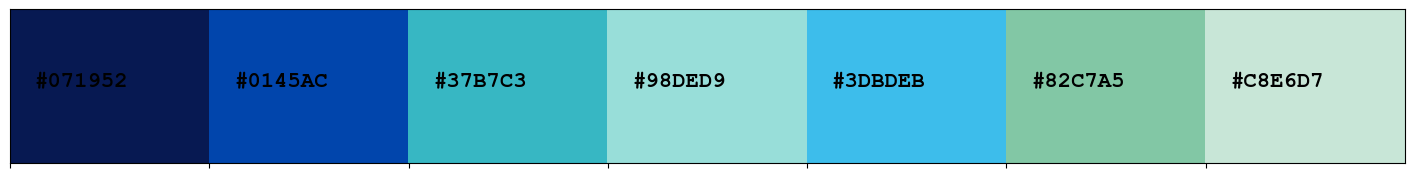

In [72]:
# creating a custom palette for my data
colorss = ['#071952','#0145AC','#37B7C3','#98DED9','#3DBDEB','#82C7A5','#C8E6D7']

sns.palplot(colorss)
plt.gcf().set_size_inches(18,2)

for idx,values in enumerate(colorss):
    plt.text(idx-0.375,0, colorss[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha = 1.0)
plt.gcf().set_facecolor('white')

plt.show()

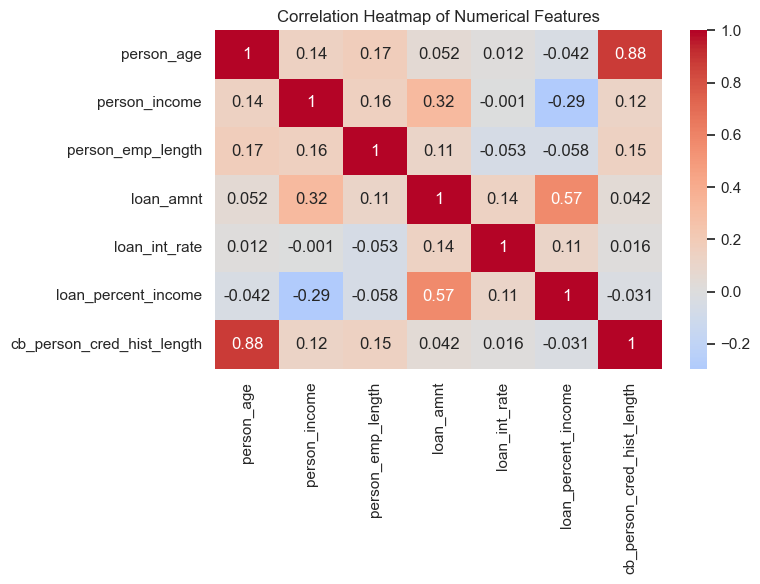

In [73]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create correlation heatmap for numerical columns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In the provided heatmap, we can observe the following:
- Positive Correlations:
   * Age and Credit History Length: A strong positive correlation (0.88) suggests that older individuals tend to have a longer credit history.
   * Loan Amount and Percent Income: A moderate positive correlation (0.57) indicates that larger loan amounts are often associated with a higher percentage of income allocated to the loan.
     
- Negative Correlations:
   * Income and Loan Percent Income: A moderate negative correlation (-0.29) suggests that individuals with higher incomes tend to have lower interest rates on their loans.
   * Person Income and loan interest rate: A weak negative correlation (-0.001) suggests that individuals with higher incomes may experience slightly lower loan interest rates.

#### **1. Key Demographics that Influences the Likelihood of Loan Default**

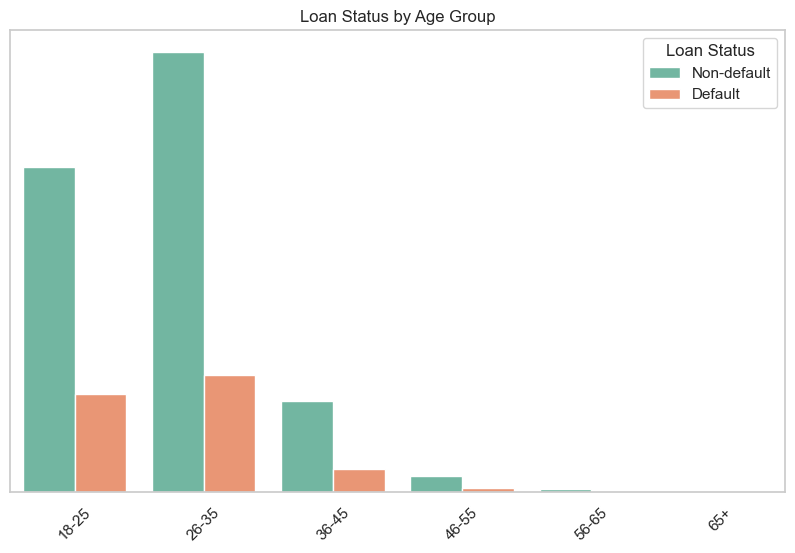

In [76]:
# Age ad loan risk

# Step 1: Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Corresponding labels

# Step 2: Create a new column for the age groups
df['age_group'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Plotting Age Groups against Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_status', data=df, palette='Set2')

# Adding titles and labels
plt.title('Loan Status by Age Group')

# Remove x-axis label
plt.xlabel("")


# Remove y-axis labels and ticks
plt.ylabel("")
plt.yticks([])

plt.legend(title='Loan Status', loc='upper right', labels=['Non-default', 'Default'])
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

The chart displays the number of loans that were defaulted on and not defaulted on by age groups.

Non-default loans: 

- The number of non-default loans generally decreases as the age group increases. 
- The highest number of non-default loans is in the 26-35 age group, followed by the 18-25 age group.
    
 Default loans:

- The number of default loans also generally decreases as the age group increases. 
- The highest number of default loans is in the 26-35 age group, followed by the 18-25 age group.
    
 Insights: 
- This suggests that the 25-35 age group may be more likely to take out loans, but also more likely to default on them.
Overall, the chart suggests that younger borrowers are more likely to default on their loans than older borrowers. 

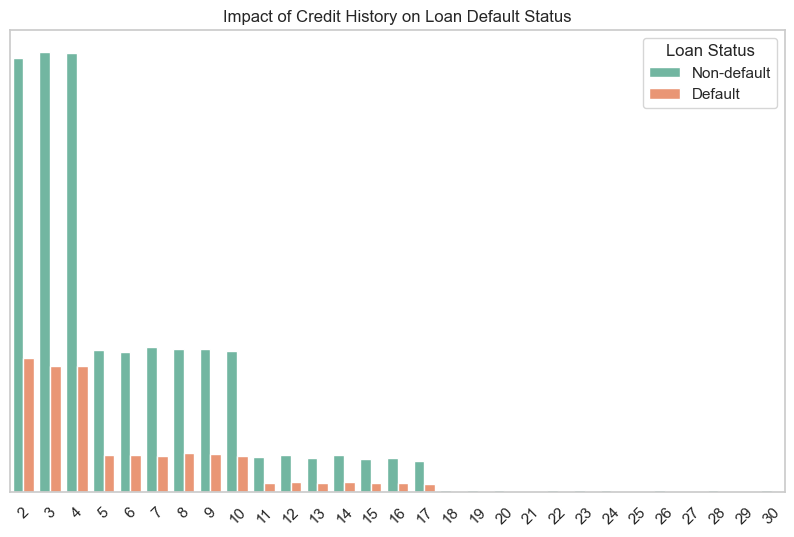

In [78]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a countplot to visualize the relationship between credit history and loan default status
plt.figure(figsize=(10, 6))
sns.countplot(x='cb_person_cred_hist_length', hue='loan_status', data=df, palette='Set2')

# Add titles and labels
plt.title('Impact of Credit History on Loan Default Status')

# Remove x-axis label
plt.xlabel("")


# Remove y-axis labels and ticks
plt.ylabel("")
plt.yticks([])

plt.legend(title='Loan Status', labels=['Non-default', 'Default'])
plt.xticks(rotation=45)
plt.show()

The chart displays the number of loans that were defaulted on and not defaulted on by credit history score.

-  Non-default loans are more common than defaulted loans across all credit history scores.
    
- The number of non-default loans decreases as the credit history score increases.
    
- The number of defaulted loans also decreases as the credit history score increases.

Insights:
- Borrowers with higher credit scores are considered less risky by lenders and are more likely to be approved for loans.
  
- Borrowers with lower credit scores may be more likely to default on loans due to financial instability or lack of credit history.

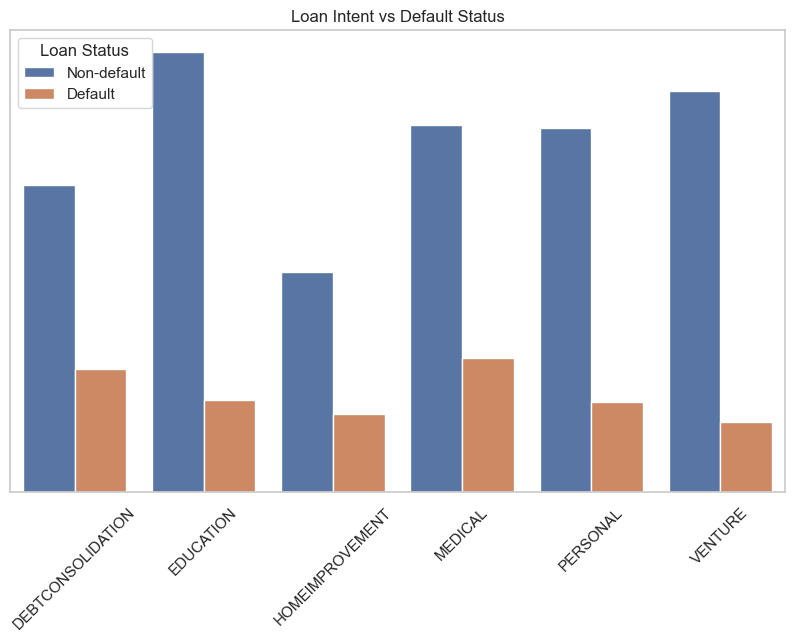

In [80]:
# Bar plot for loan intent vs default status

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.title('Loan Intent vs Default Status')

# Remove x-axis label
plt.xlabel("")


# Remove y-axis labels and ticks
plt.ylabel("")
plt.yticks([])

# plt.xlabel('Loan Intent')
# plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Non-default', 'Default'])
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

The plot shows the number of non-defaulting and defaulting loan applicants for different loan purposes. It appears that, for most loan purposes, the number of non-defaulting applicants is significantly higher than the number of defaulting applicants.

- DebtConsolidation: This loan purpose has the highest number of both non-defaulting and defaulting applicants. However, the number of non-defaulting applicants is much larger than the number of defaulting applicants.

- Education: The number of non-defaulting applicants for education loans is much higher than the number of defaulting applicants.

-  HomeImprovement: This loan purpose has the lowest number of both non-defaulting and defaulting applicants. However, the number of non-defaulting applicants is still higher than the number of defaulting applicants.
  
- Medical: The number of non-defaulting applicants for medical loans is significantly higher than the number of defaulting applicants.
  
- Personal: The number of non-defaulting applicants for personal loans is higher than the number of defaulting applicants.
  
- Venture: The number of non-defaulting applicants for venture loans is higher than the number of defaulting applicants.

Insights:
- The low default rates across various loan purposes suggest that most borrowers are able to repay their loans.
However, Debt Consolidation and Education loans stand out as categories with the highest number of non-defaulting applicants.

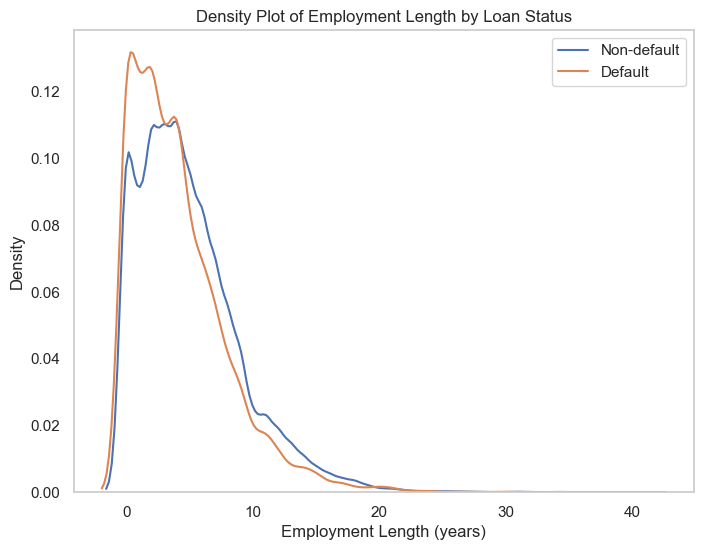

In [82]:
# 5. Density plot for employment length by loan status
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['loan_status'] == 0]['person_emp_length'], shade=False, label='Non-default')
sns.kdeplot(df[df['loan_status'] == 1]['person_emp_length'], shade=False, label='Default')
plt.title('Density Plot of Employment Length by Loan Status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

It compares the distribution of employment lengths for non-default and default loans.

Overall Distribution:
- Both non-default and default loans show a similar distribution pattern.
- The distribution is right-skewed, meaning there are more loans with shorter employment lengths compared to longer ones.
    
Comparison between Non-Default and Default Loans:
- The peak of the non-default loan distribution is slightly shifted to the right compared to the default loan distribution. 
    
- This suggests that non-default loans tend to have slightly longer employment lengths on average.
    
- The default loan distribution has a longer tail on the right side, indicating that there are more default loans with longer employment lengths compared to non-default loans.

Insights:
The chart suggests that employment length might be a factor influencing credit risk. Shorter employment lengths seem to be associated with a higher likelihood of default.

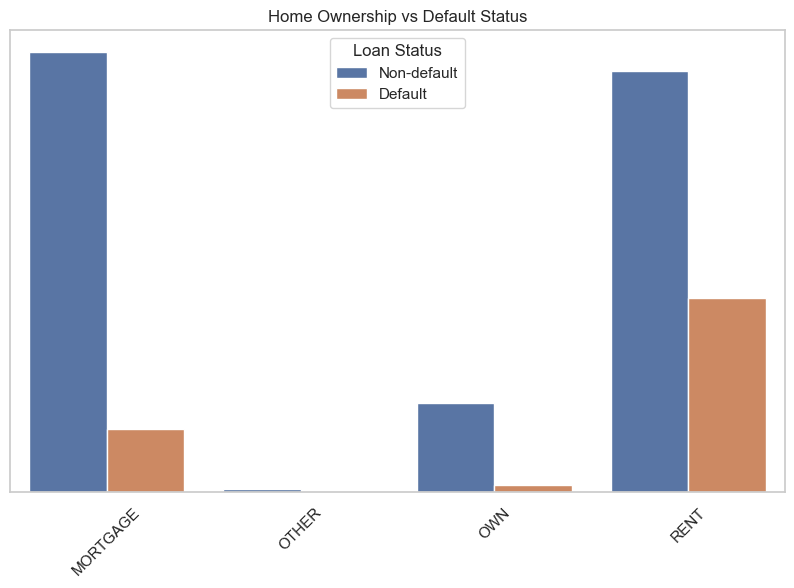

In [84]:
# Bar plot for home ownership vs default status
plt.figure(figsize=(10, 6))
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)
plt.title('Home Ownership vs Default Status')
# Remove x-axis label
plt.xlabel("")


# Remove y-axis labels and ticks
plt.ylabel("")
plt.yticks([])

# plt.xlabel('Home Ownership')
# plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Non-default', 'Default'])
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

The plot shows the number of non-defaulting and defaulting loan applicants for different home ownership statuses. It appears that, for most home ownership statuses, the number of non-defaulting applicants is significantly higher than the number of defaulting applicants.

- Mortgage: This home ownership status has the highest number of both non-defaulting and defaulting applicants. However, the number of non-defaulting applicants is much larger than the number of defaulting applicants.

- Other: The number of non-defaulting applicants for "Other" home ownership is much higher than the number of defaulting applicants.

- Own: The number of non-defaulting applicants for "Own" home ownership is higher than the number of defaulting applicants.

- Rent: The number of non-defaulting applicants for "Rent" home ownership is higher than the number of defaulting applicants.

Insights:
- Home ownership status appears to correlate with lower default rates, with homeowners generally being more likely to repay their loans.
  
- While renters also show low default rates, mortgage holders, though stable, present a moderate risk compared to other groups.

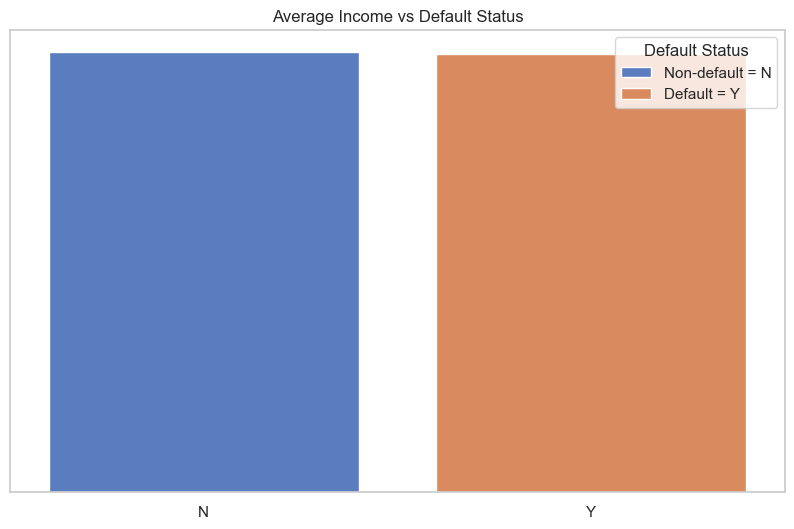

In [86]:
# Borplot to assess the relationship

plt.figure(figsize=(10, 6))
sns.barplot(x='cb_person_default_on_file', y='person_income', data=df, estimator=np.mean, ci=None, palette="muted")
plt.title('Average Income vs Default Status')
# Remove x-axis label
plt.xlabel("")


# Remove y-axis labels and ticks
plt.ylabel("")
plt.yticks([])

#plt.xlabel('Default Status')
#plt.ylabel('Average Person Income')

plt.legend(title='Default Status', labels=['Non-default = N', 'Default = Y'])

plt.grid(False)
plt.show()

The plot shows the average person income for both non-defaulting (N) and defaulting (Y) loan applicants. It appears that, on average, non-defaulting applicants have higher income compared to defaulting applicants.

Non-Defaulting Applicants (N):
- The average income for non-defaulting applicants is around 60,000.
  
Defaulting Applicants (Y):
- The average income for defaulting applicants is around 60,000.

Insights:
- While the average income for both defaulting and non-defaulting applicants appears to be the same, income may still be an important factor when combined with other financial indicators.
  
- Income alone may not fully explain loan default, and additional variables need to be considered to more accurately predict default likelihood.

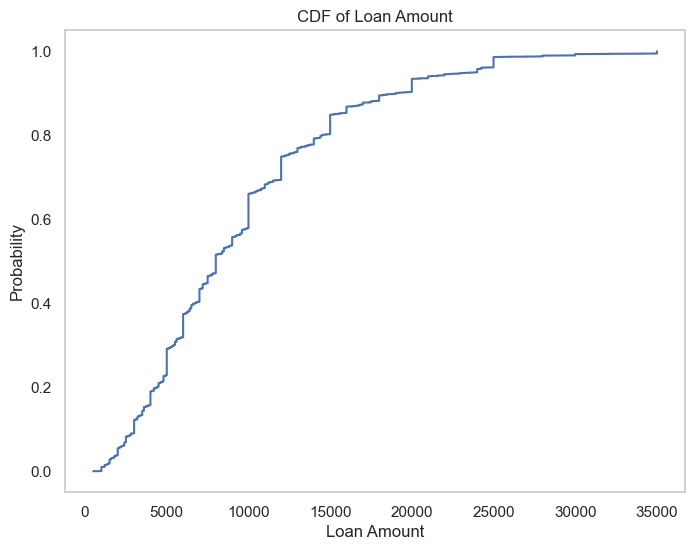

In [89]:
# CDF for loan amount
plt.figure(figsize=(8, 6))
sorted_loan_amnt = np.sort(df['loan_amnt'])
p = 1. * np.arange(len(sorted_loan_amnt)) / (len(sorted_loan_amnt) - 1)
plt.plot(sorted_loan_amnt, p)
plt.title('CDF of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Probability')
plt.grid(False)
plt.show()

A CDF plots the cumulative probability of a variable (loan amount) against its values. 

- Distribution Shape: The CDF has a steep slope at the lower end and a gradual slope towards the higher end. This indicates that a significant portion of the loans have smaller amounts, while a smaller proportion have larger amounts.
  
- Median Loan Amount: The median loan amount can be estimated by finding the point on the x-axis where the CDF reaches 0.5. In this case, it appears to be around 10,000.
 
- Range of Loan Amounts: The x-axis extends up to 35,000, suggesting that the loan amounts in this dataset range from 0 to approximately 35,000.

Insights:
- Smaller loans might involve lower risk due to affordability, while larger loans might require stricter credit evaluations due to its high risk.

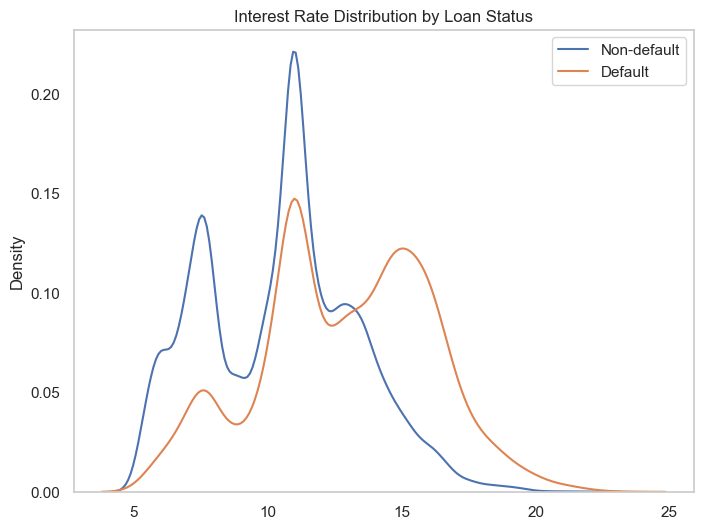

In [91]:
# Interest rate distribution by loan status

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))

# Plot KDEs for the two loan status groups
sns.kdeplot(data=df[df['loan_status'] == 0]['loan_int_rate'], 
            label='Non-default', shade=False)
sns.kdeplot(data=df[df['loan_status'] == 1]['loan_int_rate'], 
            label='Default', shade=False)

# Add title and labels
plt.title('Interest Rate Distribution by Loan Status')
# Remove x-axis label
plt.xlabel("")

plt.ylabel('Density')

# Add legend
plt.legend()

plt.grid(False)

# Show the plot
plt.show()

The graph titled "Interest Rate Distribution by Loan Status" shows the distribution of interest rates for two groups of loans: those that defaulted and those that did not.

- Non-Default Loans: The distribution for non-default loans is concentrated around 10% interest rate. There's a smaller peak around 15% and a long tail towards higher interest rates. This suggests that a majority of loans that did not default had interest rates between 5% and 15%.
  
- Default Loans: The distribution for default loans is more spread out. It has two peaks: one around 10% and another around 20%. The tail towards higher interest rates is also more pronounced than for non-default loans. This indicates that a larger proportion of defaulting loans had higher interest rates compared to non-defaulting loans.

Insights:
- The majority of non-default loans are concentrated around the 10% interest rate, reflecting a lower-risk borrower group, while default loans have a broader range of interest rates, with a notable proportion of defaults occurring at higher interest rates.

- The higher default rates at higher interest rates suggest that lenders may face greater risk in offering loans with higher interest rates, especially if these loans are granted to borrowers with higher credit risk profiles.
  
- The tail towards higher interest rates in both groups suggests that there may be a subgroup of borrowers who, despite having higher interest rates, manage to successfully repay their loans.

#### **RECOMMENDATIONS**

Based on the insights, here are five acctionable recommendations:
- Targeted lending strategies based on loan purpose could further reduce defaults.

- Implement stricter income verification and debt-to-income ratio requirements for lower-income applicants.
                                                                               
- Consider risk-based pricing with lower rates for qualified borrowers to reduce default risk.

- Enhance underwriting criteria for high-risk loan purposes and potentially require additional collateral.

- Factor home ownership more heavily into risk assessment models, with adjusted terms for different ownership categories.

- Implement sliding scale loan limits based on income and credit profile.

#### **MACHINE LEARNING**

In [96]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [97]:
# View Dat Columns

df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group'],
      dtype='object')

In [98]:
# Load Data

df = df.drop(columns=['age_group'])
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [99]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Define categorical and numerical columns
categorical_cols_total = ['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file']

categorical_cols =['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
numerical_cols = ['person_age','person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']

# Preprocess categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [100]:
# Define X (features) and y (target)

X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (32571, 10)
y shape: (32571,)


In [101]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,-1.086316,-1.071311,2,0.060106,1,-1.358804,0.042329,-0.657598,0,-0.938924
2,-0.439031,-1.071311,0,-0.944616,3,-0.646824,0.603708,3.744978,0,-0.691989
3,-0.762673,-0.007213,3,-0.191075,3,4.020601,1.369520,3.370291,0,-0.938924
4,-0.600852,-0.218510,3,0.813647,3,4.020601,1.058003,3.557634,1,-0.445054
5,-1.086316,-1.065600,2,-0.693436,5,-1.121477,-1.255658,0.747479,0,-0.938924
...,...,...,...,...,...,...,...,...,...,...
32576,4.739251,-0.245160,0,-0.944616,4,-0.599358,0.697812,-0.563926,0,5.975263
32577,4.253787,1.030234,0,-0.191075,4,1.271567,-1.142085,-0.189239,0,3.258975
32578,6.033822,0.192662,3,-0.442255,2,4.020601,-0.006346,2.714588,0,5.481392
32579,4.577430,1.601306,0,0.060106,4,0.856245,0.152657,-0.657598,0,4.987522


In [102]:
y

1        0
2        1
3        1
4        1
5        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32571, dtype: category
Categories (2, int64): [0, 1]

In [103]:
# Splitting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

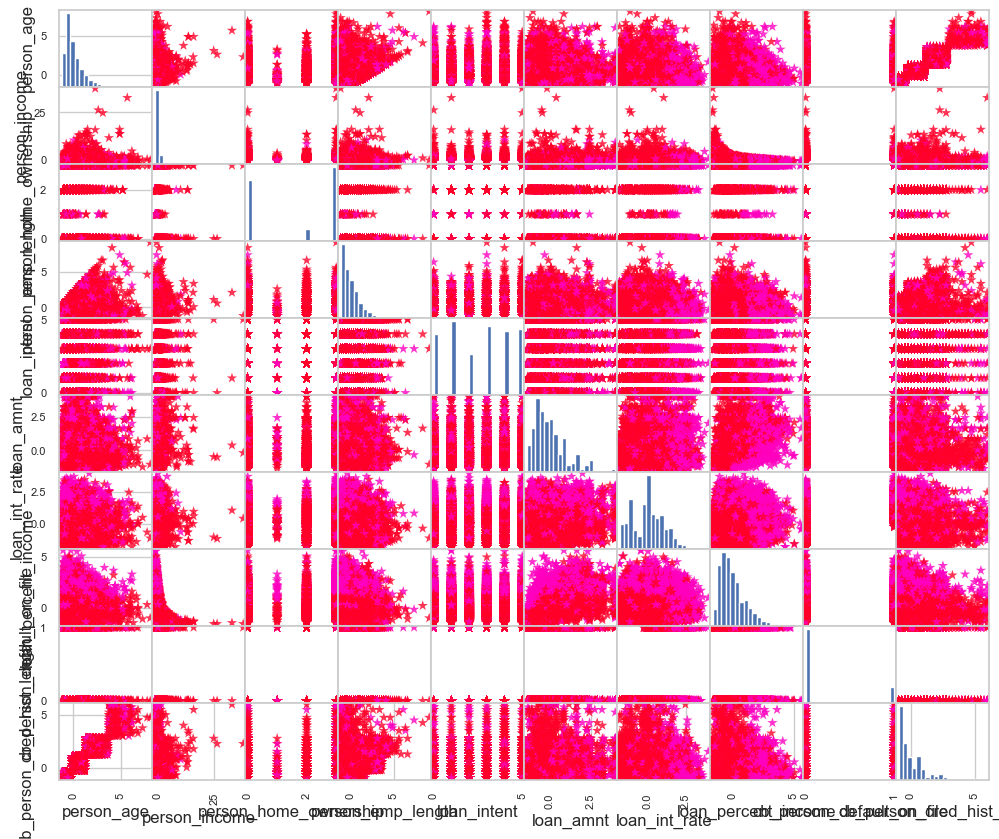

In [104]:
from matplotlib import cm #import matplotlib color map

pd.plotting.scatter_matrix(X_train,c=y_train, figsize=(12, 10), marker='*',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = cm.get_cmap('gist_rainbow'))
plt.show()

#### **Gradient Boosting Classifier**

In [106]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9109701187065083

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7622
           1       0.93      0.64      0.76      2150

    accuracy                           0.91      9772
   macro avg       0.92      0.81      0.85      9772
weighted avg       0.91      0.91      0.90      9772


Confusion Matrix:
[[7526   96]
 [ 774 1376]]


The Gradient Boosting Classifier achieved an accuracy score of 91%, indicating that the model explains a significant proportion of the variance in the target variable. This performance suggests the model is well-suited for predicting outcomes based on the given features. However, there is still room for improvement in capturing the remaining 9% of variance.

#### **Conclusion**

The **Credit Risk Analysis** project has delivered meaningful insights into the factors influencing loan default risk, drawing from borrower demographics, financial behavior, and loan attributes. By examining these dimensions, the analysis highlighted patterns that inform better risk assessment and lending strategies. Some of the key findings include:

* **Older borrowers** are generally lower risk due to longer credit histories.
* The **26–35 age group** shows the highest loan activity and default rates.
* **Higher credit scores** strongly correlate with lower default probability.
* **Larger loan-to-income ratios** and **higher interest rates** are linked to increased risk.
* **Debt Consolidation** and **Education loans** exhibit higher volume and default risk.
* **Smaller loan amounts** dominate, while larger loans carry more risk.
* **Employment length** has a modest influence on reducing defaults.
* **Homeowners and mortgage holders** tend to be more financially stable than renters.
* **Income alone** is not a reliable predictor but adds value when combined with other variables.

Based on these insights, a **Credit Risk Predictor** was developed to assess the likelihood of loan default. This tool enhances decision-making by supporting more accurate interest rate pricing, improving customer targeting, and minimizing financial losses. The model achieved a **91% accuracy rate**, indicating robust performance, with potential for further refinement to improve predictive power.


#### **Recommendations for Future Work**

**Model Refinement**:

* **Advanced Feature Engineering**: Exploring additional features like debt-to-income ratio, recent loan history, and spending behaviors could enhance the model's ability to predict defaults more accurately.
* **Hyperparameter Tuning**: Performing a more comprehensive hyperparameter optimization (e.g., grid search, random search) to improve the model's predictive accuracy.

**Data Collection & Expansion**:

* **Broader Data Sources**: Integrating external data sources such as credit bureau information, transactional data, and macroeconomic indicators could provide a more complete borrower profile.
* **Handling Imbalanced Data**: Employing techniques like oversampling or class weighting to address the imbalance between defaulting and non-defaulting borrowers, ensuring the model better generalizes to both classes.

**Deployment & Monitoring**:

* **Real-Time Application**: Deploying the model into production for real-time credit scoring, enabling quicker loan approvals and more accurate risk assessments.
* **Model Monitoring and Maintenance**: Setting up continuous monitoring systems to track the model’s performance in real-world applications, coupled with regular retraining cycles to incorporate new data trends and ensure optimal performance over time.

**Model Transparency**:

* **Interpretability and Explainability**: Implementing tools like SHAP or LIME to enhance model interpretability, allowing lenders to better understand the reasoning behind predictions, improving trust in automated decision- and trust for lenders.
